# Technical Analysis 

## What Is Technical Analysis?

Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume. Unlike fundamental analysis, which attempts to evaluate a security's value based on business results such as sales and earnings, technical analysis focuses on the study of price and volume. In my humble view I view this analysis as psuedo scientific but there might be some value in uderstanding this realm of investing. Lets figure it out using backtesting. 

In [1]:
#Loading essential library for this project
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import yfinance as yf
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [53]:
# I want to analyse Tesla as it has a cult following thus testing technical features to trade
data = yf.download('TSLA')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300


## Technical Analysis Indicators

Across the industry, there are hundreds of patterns and signals that have been developed by researchers to support technical analysis trading. Technical analysts have also developed numerous types of trading systems to help them forecast and trade on price movements. Some indicators are focused primarily on identifying the current market trend, including support and resistance areas, while others are focused on determining the strength of a trend and the likelihood of its continuation. Commonly used technical indicators and charting patterns include trendlines, channels, moving averages, and momentum indicators.
In general, technical analysts look at the following broad types of indicators:

- Price trends
- Chart patterns
- Volume and momentum indicators
- Oscillators
- Moving averages
- Support and resistance levels

Lets start with the most basic strategy of moving averages.

In [54]:
#Lets define the short and long period for coming simple moving average
SMA1 = 42
SMA2 = 252
data['SMA1'] = data['Adj Close'].rolling(SMA1).mean()
data['SMA2'] = data['Adj Close'].rolling(SMA2).mean()

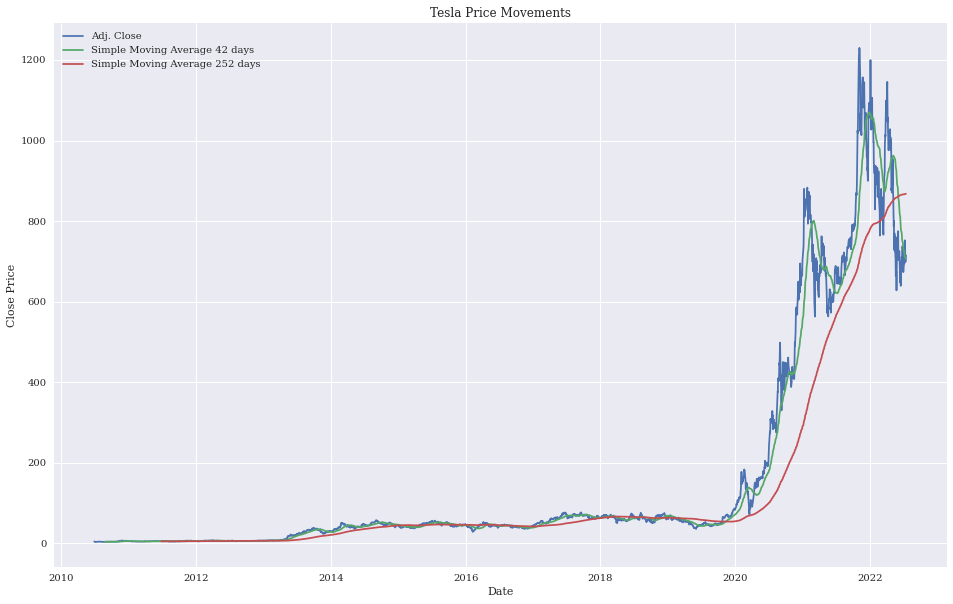

In [55]:
#Lets visualise the price and SMA
plt.figure(figsize=(16, 10))
plt.plot(data['Adj Close'],label = 'Adj. Close')
plt.plot(data['SMA1'],label = 'Simple Moving Average 42 days')
plt.plot(data['SMA2'],label = 'Simple Moving Average 252 days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Tesla Price Movements');


The trading rules are:
- Go long (= +1) when the shorter SMA1 is above the longer SMA2.
- Go short (= -1) when the shorter SMA1 is below the longer SMA2.

In [56]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1) #condition to go long or short
mask = data[['Adj Close','SMA1','SMA2','Position']]
mask

,Adj Close,SMA1,SMA2,Position
Date,,,,
2011-06-27,5.492000,5.538333,4.894484,1
2011-06-28,5.622000,5.540476,4.897833,1
2011-06-29,5.658000,5.543762,4.901373,1
2011-06-30,5.826000,5.551762,4.907063,1
2011-07-01,5.804000,5.562000,4.914857,1
...,...,...,...,...
2022-07-08,752.289978,711.454045,867.208766,-1
2022-07-11,703.030029,709.452141,867.391624,-1
2022-07-12,699.210022,707.051428,867.445235,-1


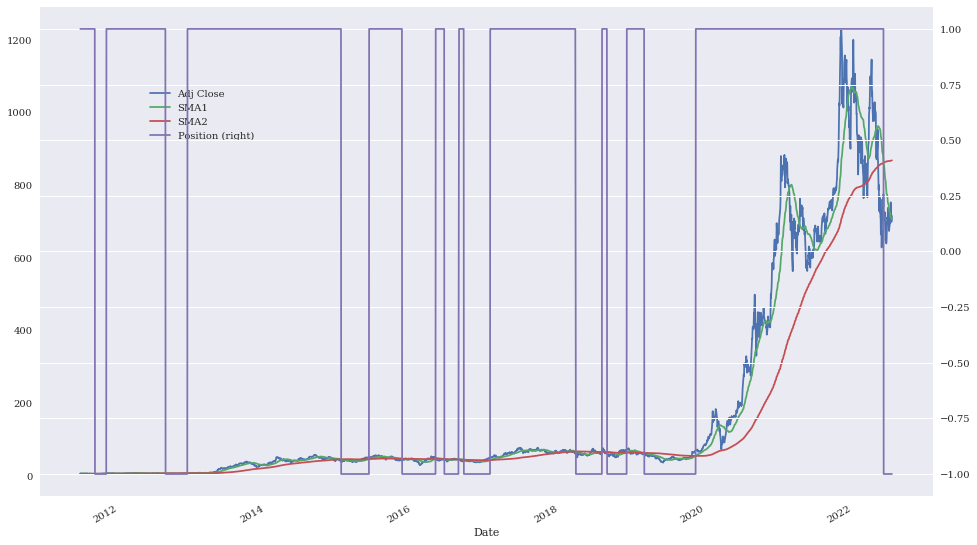

In [57]:
ax = mask.plot(secondary_y='Position', figsize=(16, 10))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## Vectorized Backtesting

The vectorized backtesting can now be implemented as follows. First, the log returns are calculated. Then the positionings, represented as +1 or -1, are multiplied by the relevant log return. This simple calculation is possible since a long position earns the return of the Tesla stock and a short position earns the negative return of the Tesla. The basic idea is that the algorithm can only set up a position in the Apple stock given today’s market data (e.g., just before the close). The position then earns tomorrow’s return. stock. Finally, the log returns for the Apple stock and the algorithmic trading strategy based on SMAs need to be added up and the exponential function applied to arrive at the performance values:

In [58]:
mask['Returns'] = np.log(mask['Adj Close'] / mask['Adj Close'].shift(1))
mask['Strategy'] = mask['Position'].shift(1) * mask['Returns']
mask

C:\Users\shubh\AppData\Local\Temp/ipykernel_14436/3737724171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['Returns'] = np.log(mask['Adj Close'] / mask['Adj Close'].shift(1))
C:\Users\shubh\AppData\Local\Temp/ipykernel_14436/3737724171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['Strategy'] = mask['Position'].shift(1) * mask['Returns']


,Adj Close,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2011-06-27,5.492000,5.538333,4.894484,1,NaN,NaN
2011-06-28,5.622000,5.540476,4.897833,1,0.023395,0.023395
2011-06-29,5.658000,5.543762,4.901373,1,0.006383,0.006383
2011-06-30,5.826000,5.551762,4.907063,1,0.029260,0.029260
2011-07-01,5.804000,5.562000,4.914857,1,-0.003783,-0.003783
...,...,...,...,...,...,...
2022-07-08,752.289978,711.454045,867.208766,-1,0.025117,-0.025117
2022-07-11,703.030029,709.452141,867.391624,-1,-0.067722,0.067722
2022-07-12,699.210022,707.051428,867.445235,-1,-0.005448,0.005448


In [59]:
mask.dropna(inplace=True)
np.exp(mask[['Returns', 'Strategy']].sum())
mask[['Returns', 'Strategy']].std() * 252 ** 0.5

C:\Users\shubh\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Returns     0.561095
Strategy    0.561712
dtype: float64

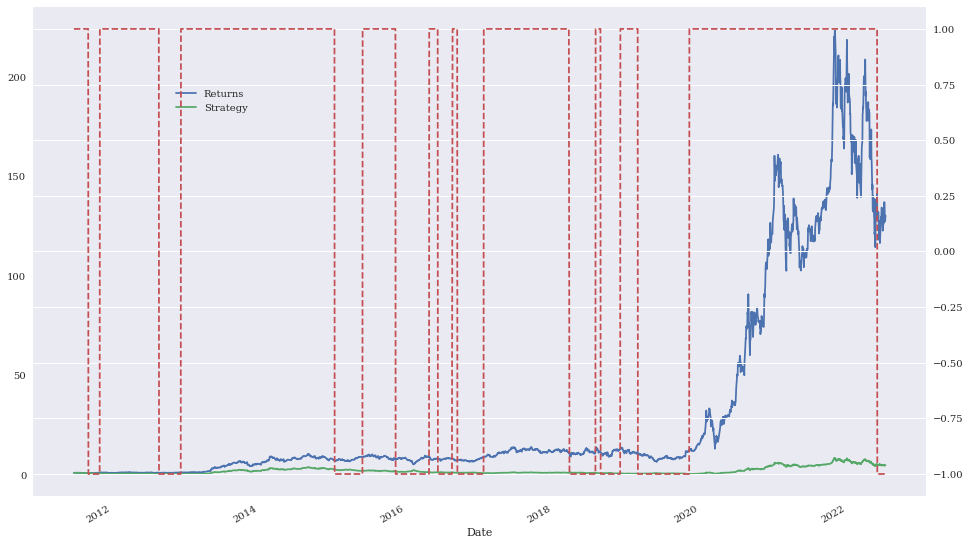

In [60]:
ax = mask[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16, 10))
mask['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

For Tesla stocks buy and hold stratergy outperforms the SMA strategy in backtest. Lets try to optimize this strategy further by adding different periods and rank the results using brute force.

In [62]:
from itertools import product
data = yf.download('TSLA')
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

[*********************100%***********************]  1 of 1 completed


In [63]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw['Adj Close'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data['SMA1'] = data['Adj Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Adj Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
                            {'SMA1': SMA1, 'SMA2': SMA2,
                            'MARKET': perf['Returns'],
                            'STRATEGY': perf['Strategy'],
                            'OUT': perf['Strategy'] - perf['Returns']},
                            index=[0]), ignore_index=True)

In [65]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
42,32,270,122.045071,10.343489,-111.701582
52,36,260,124.078444,11.866973,-112.211471
38,32,230,123.350587,10.589682,-112.760905
41,32,260,124.078444,10.985152,-113.093291
49,36,230,123.350587,9.503346,-113.847241
51,36,250,129.003974,15.011751,-113.992223
9,20,270,122.045071,7.737255,-114.307816


The Buy and hold strategy beats our optimized SMA everytime. Lets focus on other technical features that might be useful in beating as simple buy hold strategy for Tesla.

## Exponential Moving Average

A EMA allows you to see the big picture when analyzing a stock. Unlike the Simple Moving Average it reduces the lag by putting more emphasis on recent price data.

In [69]:
data = yf.download('TSLA')
ema1 = range(20, 61, 4)
ema2 = range(180, 281, 10)

[*********************100%***********************]  1 of 1 completed


In [72]:
results = pd.DataFrame()
for EMA1, EMA2 in product(ema1, ema2):
    data = pd.DataFrame(raw['Adj Close'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data['EMA1'] = data['Adj Close'].ewm(span=EMA1, adjust=False).mean()
    data['EMA2'] = data['Adj Close'].ewm(span=EMA2, adjust=False).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['EMA1'] > data['EMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
                            {'EMA1': EMA1, 'EMA2': EMA2,
                            'MARKET': perf['Returns'],
                            'STRATEGY': perf['Strategy'],
                            'OUT': perf['Strategy'] - perf['Returns']},
                            index=[0]), ignore_index=True)

In [74]:
data

,Adj Close,Returns,EMA1,EMA2,Position,Strategy
Date,,,,,,
2010-07-01,4.392000,-0.081723,4.764964,4.775168,-1,0.081723
2010-07-02,3.840000,-0.134312,4.734637,4.768512,-1,0.134312
2010-07-06,3.222000,-0.175470,4.685042,4.757505,-1,0.175470
2010-07-07,3.160000,-0.019430,4.635041,4.746134,-1,0.019430
2010-07-08,3.492000,0.099903,4.597564,4.737208,-1,-0.099903
...,...,...,...,...,...,...
2022-07-08,752.289978,0.025117,767.455542,807.521731,-1,-0.025117
2022-07-11,703.030029,-0.067722,765.343230,806.778018,-1,0.067722
2022-07-12,699.210022,-0.005448,763.174928,806.012409,-1,0.005448


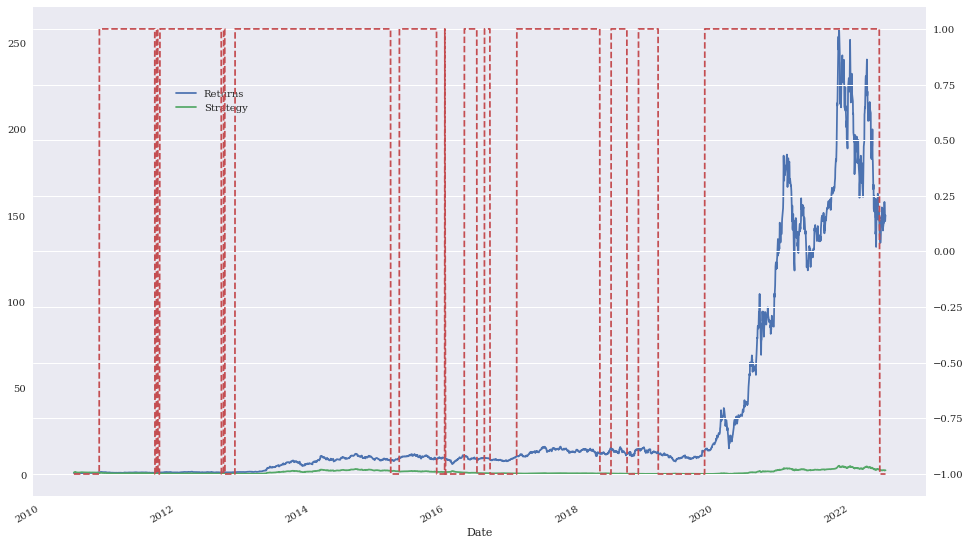

In [75]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16, 10))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## RSI Strategy:

In [54]:
data = yf.download('TSLA')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500


In [55]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)


In [57]:
def get_rsi(price):
    """
    Args:
        price (pd.DataFrame)  : pd.DataFrame include stock_price
        code (int)  : A local code for a listed company
    Returns:
        feature DataFrame (pd.DataFrame)
    """
    df = price.copy()
    df['Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    period = 14
    df[f"RSI_{period}days"] = RSI(df['Adj Close'], period)
    
    return df

data = get_rsi(data)
data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,Returns,RSI_14days
Date,,,,,,,,
2010-08-09,3.980000,3.996000,3.890000,3.920000,3.920000,4063500,0.000510,45.152357
2010-08-10,3.930000,3.930000,3.764000,3.806000,3.806000,6406500,-0.029513,41.614295
2010-08-11,3.738000,3.776000,3.570000,3.580000,3.580000,3988000,-0.061216,35.650312
2010-08-12,3.560000,3.580000,3.478000,3.520000,3.520000,3455000,-0.016902,34.247034
2010-08-13,3.636000,3.690000,3.532000,3.664000,3.664000,3170000,0.040094,40.318793
...,...,...,...,...,...,...,...,...
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,-0.067722,48.052617
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300,-0.005448,47.486915
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500,0.016890,49.483710


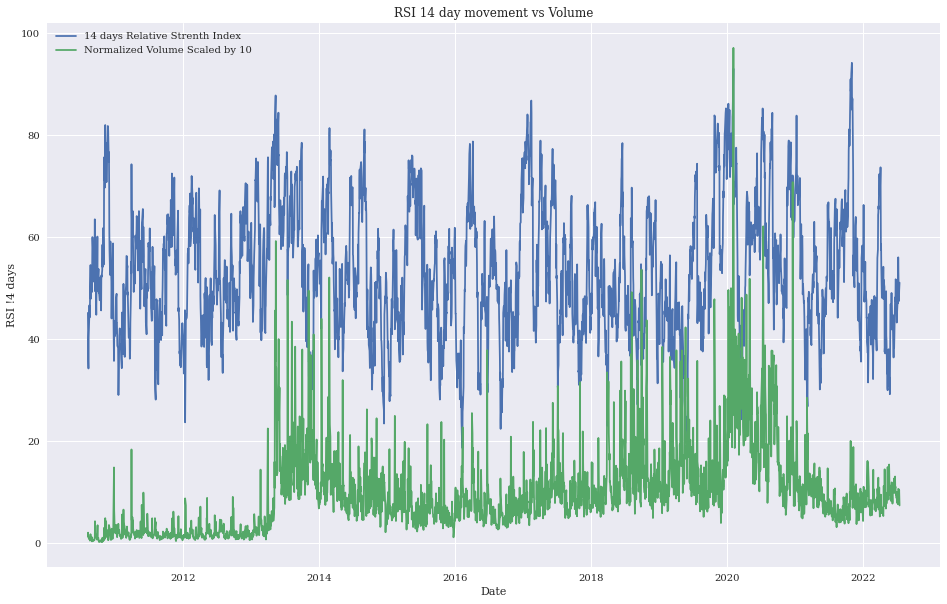

In [58]:
plt.figure(figsize=(16, 10))
plt.plot(data['RSI_14days'],label = '14 days Relative Strenth Index')
plt.plot((data['Volume']/data['Volume'].mean())*10,label = 'Normalized Volume Scaled by 10')
plt.xlabel('Date')
plt.ylabel('RSI !4 days')
plt.legend()
plt.title('RSI 14 day movement vs Volume');

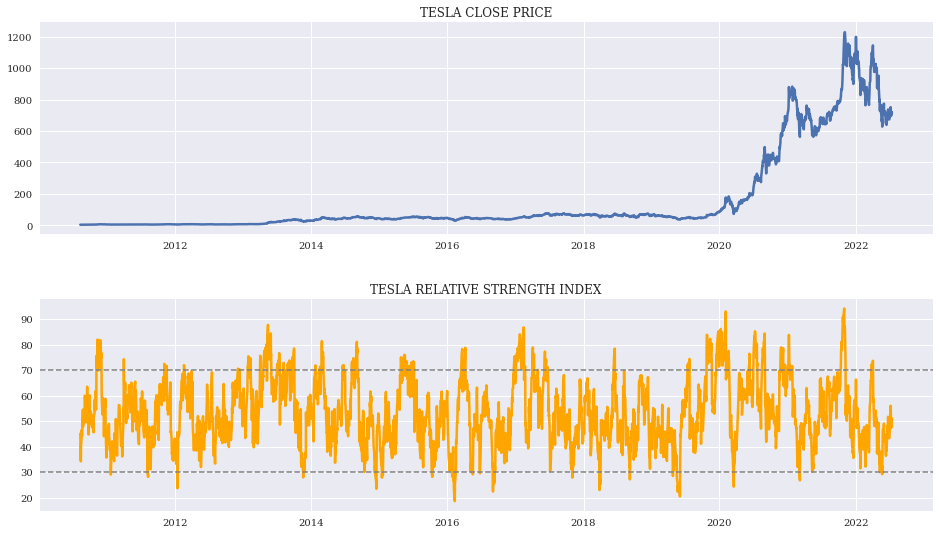

In [59]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data['Adj Close'], linewidth = 2.5)
ax1.set_title('TESLA CLOSE PRICE')
ax2.plot(data['RSI_14days'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('TESLA RELATIVE STRENGTH INDEX')
plt.show()

In [60]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
        

In [61]:
buy_price, sell_price, rsi_signal = implement_rsi_strategy(data['Adj Close'], data['RSI_14days'])

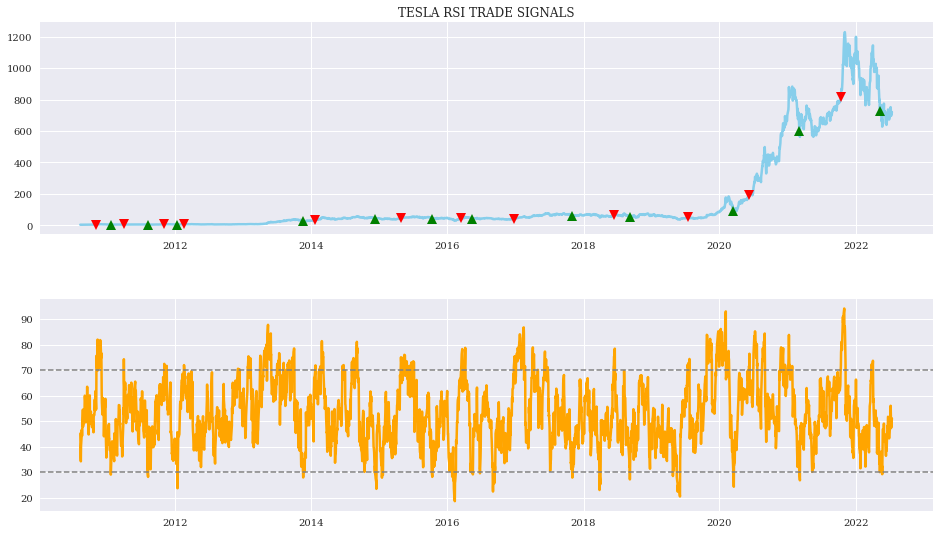

In [62]:
plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(data['Adj Close'], linewidth = 2.5, color = 'skyblue', label = 'IBM')
ax1.plot(data.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(data.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('TESLA RSI TRADE SIGNALS')
ax2.plot(data['RSI_14days'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()


In [63]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Adj Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        

In [64]:
data['Position'] = position
data

,Open,High,Low,Close,Adj Close,Volume,Returns,RSI_14days,Position
Date,,,,,,,,,
2010-08-09,3.980000,3.996000,3.890000,3.920000,3.920000,4063500,0.000510,45.152357,1
2010-08-10,3.930000,3.930000,3.764000,3.806000,3.806000,6406500,-0.029513,41.614295,1
2010-08-11,3.738000,3.776000,3.570000,3.580000,3.580000,3988000,-0.061216,35.650312,1
2010-08-12,3.560000,3.580000,3.478000,3.520000,3.520000,3455000,-0.016902,34.247034,1
2010-08-13,3.636000,3.690000,3.532000,3.664000,3.664000,3170000,0.040094,40.318793,1
...,...,...,...,...,...,...,...,...,...
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,-0.067722,48.052617,1
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300,-0.005448,47.486915,1
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500,0.016890,49.483710,1


In [65]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data

,Open,High,Low,Close,Adj Close,Volume,Returns,RSI_14days,Position,Strategy
Date,,,,,,,,,,
2010-08-09,3.980000,3.996000,3.890000,3.920000,3.920000,4063500,0.000510,45.152357,1,NaN
2010-08-10,3.930000,3.930000,3.764000,3.806000,3.806000,6406500,-0.029513,41.614295,1,-0.029513
2010-08-11,3.738000,3.776000,3.570000,3.580000,3.580000,3988000,-0.061216,35.650312,1,-0.061216
2010-08-12,3.560000,3.580000,3.478000,3.520000,3.520000,3455000,-0.016902,34.247034,1,-0.016902
2010-08-13,3.636000,3.690000,3.532000,3.664000,3.664000,3170000,0.040094,40.318793,1,0.040094
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,-0.067722,48.052617,1,-0.067722
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300,-0.005448,47.486915,1,-0.005448
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500,0.016890,49.483710,1,0.016890


In [66]:
data.dropna(inplace=True)
np.exp(data[['Returns', 'Strategy']].sum())
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.562182
Strategy    0.335082
dtype: float64

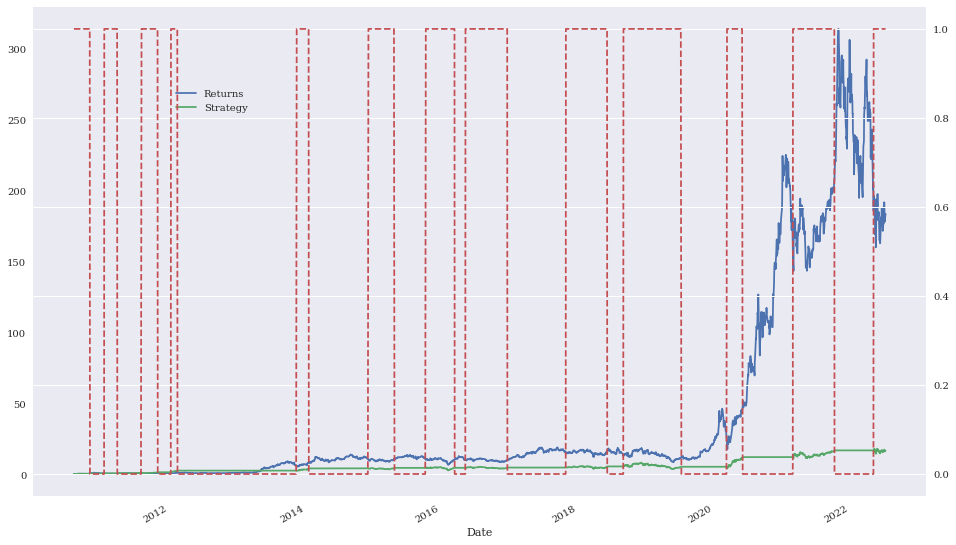

In [67]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16, 10))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

## Momentum Strategy:

In [7]:
data = yf.download('TSLA')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500
2022-07-14,704.690002,715.960022,688.000000,714.940002,714.940002,26185800
2022-07-15,720.000000,730.869995,710.669983,720.200012,720.200012,23165500


In [8]:
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']
to_plot = ['returns']

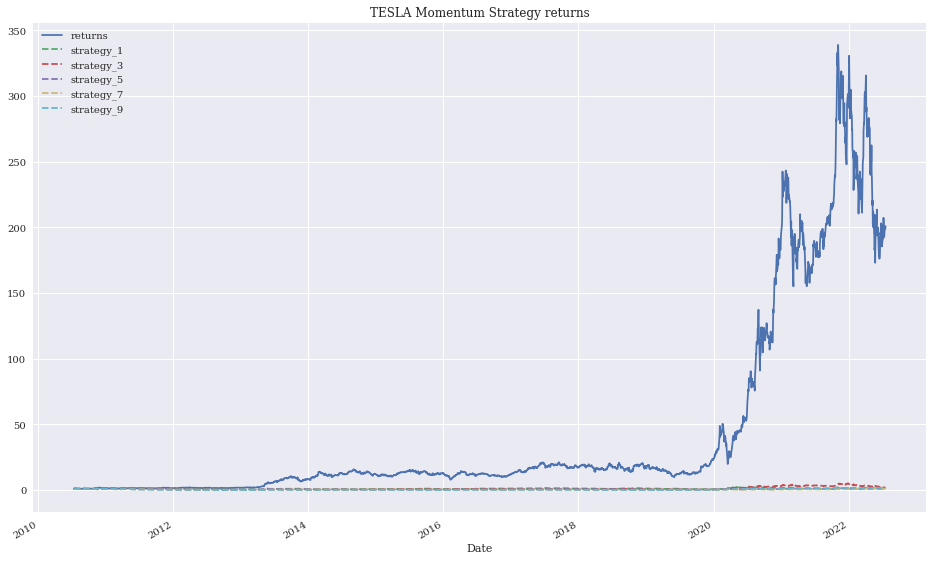

In [11]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title='TESLA Momentum Strategy returns', figsize=(16, 10), style=['-', '--', '--', '--', '--', '--']);